# The response distribution

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats

<b> Problem 4.4 <b> 

In Problem 3.2, we plotted a posterior distribution along with a likelihood function.
Repeat parts (a) to (f) of that problem, but instead of using a single value of the measurement xobs,
start with a fixed value of the stimulus, namely s = 10. From this value of s, draw five values of
xobs from the measurement distribution. You should observe that, from trial to trial, the likelihood
function and posterior probability density function both “jump around”, similar to Fig. 4.1.

In [41]:
#stimulus

step = 0.2
S = np.arange(0,40 + step, step)
mean_S = 10
Sd_S = 4
prior = stats.norm.pdf(S, mean_S, Sd_S)

#measurement
s_true = 10
std_x_given_s = 5
x_obs_values = np.random.normal(s_true, std_x_given_s, 5)

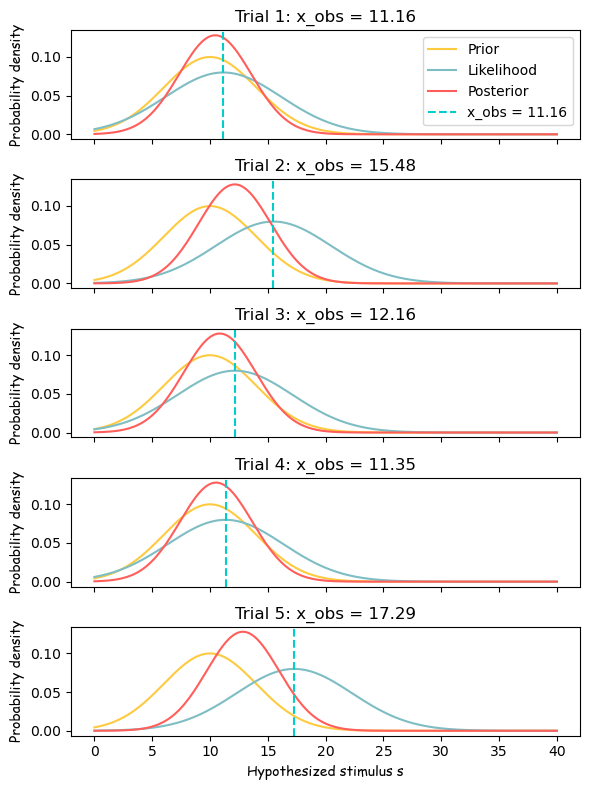

In [48]:
fig, axes = plt.subplots(5, 1, figsize=(6, 8), sharex=True)

for i, x_obs in enumerate(x_obs_values):
    # Step 5: Compute the likelihood for each x_obs
    likelihood = stats.norm.pdf(S, x_obs, std_x_given_s)
    
    # Step 6: Compute the unnormalized posterior
    unnormalized_posterior = likelihood * prior
    
    # Step 7: Normalize the posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior * 0.2)
    plt.style.use('seaborn-v0_8-pastel')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Step 8: Plot prior, likelihood, and posterior
    axes[i].plot(S, prior, label='Prior', color=color_custom[1])
    axes[i].plot(S, likelihood, label='Likelihood', color=color_custom[2])
    axes[i].plot(S, posterior, label='Posterior', color=color_custom[0])
    axes[i].axvline(x_obs, color=color_custom[3], linestyle='--', label=f'x_obs = {x_obs:.2f}')
    axes[i].set_title(f'Trial {i+1}: x_obs = {x_obs:.2f}')
    axes[4].set_xlabel('Hypothesized stimulus s',**csfont)
    axes[i].set_ylabel('Probability density',**csfont)
    axes[0].legend()

plt.tight_layout()
plt.show()

<b> Problem 4.6 <b>

An observer infers a stimulus s from a measurement xobs. As in the chapter, the
measurement distribution p(x|s) is Gaussian with mean s and variance σ2. Unlike in the chapter,
we use the prior
p(s) = e−λs, (4.17)
where λ is a positive constant. This is an improper prior (see Section 3.5.2) but that does not stop
us.
a) Derive an equation for the posterior mean estimate.
b) Derive an equation for the distribution of the posterior mean estimate for given s.

In [124]:
#measurement
step = 0.2
S = np.arange(0,40 + step, step)
xobs = 20
sd = 5
likelihood = stats.norm.pdf(S, xobs, sd)
l = 0.1
prior = np.exp(-l * S)
unnormalized_posterior = prior*likelihood
posterior = unnormalized_posterior/np.trapz(unnormalized_posterior, S)
posterior_mean_estimate = np.trapz(S*posterior, S)

In [125]:
posterior_mean_estimate

17.50429084815687

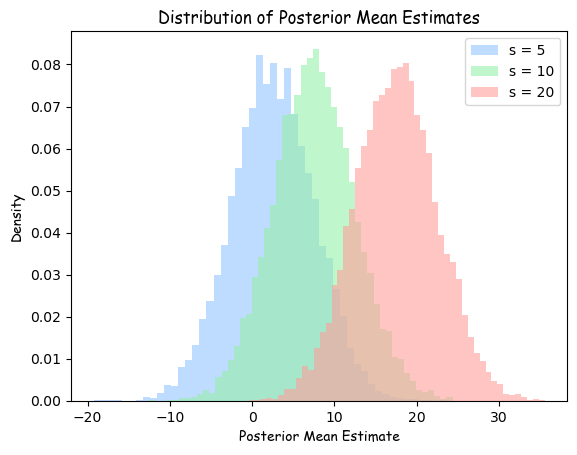

In [136]:
s_values = np.array([5, 10, 20])  
num_samples = 10000  

posterior_means = {}
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
for s in s_values:
    # Draw samples from the measurement distribution N(s, sd^2)
    xobs_samples = np.random.normal(s, sd, num_samples)
    # Calculate posterior mean estimates for each sample
    # we have a shift (reade section 3.5.2)
    posterior_mean_samples = xobs_samples - (l * sd**2)
    posterior_means[s] = posterior_mean_samples

    plt.hist(posterior_mean_samples, bins=50, density=True, alpha=0.6, label=f's = {s}')

# Plot settings
plt.xlabel('Posterior Mean Estimate',**csfont)
plt.ylabel('Density',**csfont)
plt.title('Distribution of Posterior Mean Estimates',**csfont)
plt.legend()
plt.show()